

Por medio del siguiente proyecto identificaremos los patrones que determinan si un juego tiene éxito o no, Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias. Esto lo haremos por información otorgada por la tienda online *Ice*, como las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos. Este análisis es importante, ya que nos entregará información para poder invertir o realizar una asesoría de inversión para el año 2017.

### Tabla de contenidos
 - **1. Abrimos el archivo de datos y estudiamos la información general**
  - Cargamos las librerías
  - Cargamos los datos
 - **2. Preparamos los datos**
  - Corregimos formatos de nombres de columnas
  - Abordamos valores ausentes
  - Cambiamos los formatos de las columnas a los tipos necesarios
  - Calculamos las ventas totales
 - **3. Analisis de los datos**
  - Revisamos cuántos juegos fueron lanzados en diferentes años
  - Observamos cómo varían las ventas entre las plataformas
  - Ahora determinaremos para qué periodo tomaremos datos
  - Filtramos la tabla a partir del año seleccionado
  - ¿Qué plataformas son líderes en ventas?
  - Creamos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma
  - Ahora veremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular
  - Comparamos las ventas de los mismos juegos en otras plataformas
 - **4. Creamos un perfil de usuario para cada región**
  - Comenzaremos determinando las cinco plataformas principales para cada región y describiremos las variaciones en sus cuotas de mercado de una región a otra
  - Ahora veremos los cinco géneros principales por región
  - Ahora veremos si las clasificaciones de ESRB afectan a las ventas
 - **5. Probamos las hipótesis**
  - Prueba 1
  - Prueba 2
 - **6. Conclusión general**

# Abrimos el archivo de datos y estudiamos la información general

### Cargamos las librerías

In [ ]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind
import math

### Cargamos los datos

In [ ]:
# Cargamos el DataFrame
ice = pd.read_csv('/datasets/games.csv')

En esta sección exploraremos nuestro DataFrame.

In [ ]:
# Reviamosa el dataFrame
ice.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# Revisamos su información general
print(ice.info())
print()
print(ice.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

(16715, 11)


In [ ]:
# Revisamos su distribución
ice.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Revisamos los nombres de las columnas para ver qué corregir
ice.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
# Revisamos si hay datos duplicados
ice.duplicated().sum()

0

In [ ]:
# Revisamos la cantidad de valores ausentes por columna
ice.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
# Calculamos porcentaje de valores ausentes
nameisna = ice.Name.isna().sum() / len(ice.Name) * 100
releaseyearisna = ice.Year_of_Release.isna().sum() / len(ice.Year_of_Release) * 100
genreisna = ice.Genre.isna().sum() / len(ice.Genre) * 100
criticisna = ice.Critic_Score.isna().sum() / len(ice.Critic_Score) * 100
userisna = ice.User_Score.isna().sum() / len(ice.User_Score) * 100
ratingisna = ice.Rating.isna().sum() / len(ice.Rating) * 100


In [ ]:
# Mostramos los porcentajes de valores ausentes
print(f"Porcentaje de 'NaN' en 'Name': {nameisna}%")
print(f"Porcentaje de 'NaN' en 'Year_of_Release': {releaseyearisna}%")
print(f"Porcentaje de 'NaN' en 'Genre': {genreisna}%")
print(f"Porcentaje de 'NaN' en 'Critic_Score': {criticisna}%")
print(f"Porcentaje de 'NaN' en 'User_Score': {userisna}%")
print(f"Porcentaje de 'NaN' en 'Rating': {ratingisna}%")

Porcentaje de 'NaN' en 'Name': 0.011965300628178284%
Porcentaje de 'NaN' en 'Year_of_Release': 1.609332934489979%
Porcentaje de 'NaN' en 'Genre': 0.011965300628178284%
Porcentaje de 'NaN' en 'Critic_Score': 51.31917439425665%
Porcentaje de 'NaN' en 'User_Score': 40.08973975471134%
Porcentaje de 'NaN' en 'Rating': 40.478612025127134%


In [ ]:
# Además veremos por qué la columna 'User_Score' está en tipo object
ice.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
ice.User_Score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1         2
1.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

Al analizar **User_Score** podemos ver que hay números en formato string mezclados con valores **'tbd', siglas para 'To Be Determined'**. Buscaremos abordar los 'tbd' de modo de poder dejar la columna en float64, con el fin de hacer cálculos sin problemas.

Al analizar el DataFrame **'ice'** encontramos lo siguiente

 - 1. El DataFrame **ice** se compone de 16.715 filas y 11 columnas.
 - 2. Los nombres de las columnas tienen mayúsculas. **Dejaremos todo en minúsculas**.
 - 3. Al revisar los 'NaN', pudimos ver que las columnas **Name**, **Year_of_Release**, **Genre**, **Critic_Score**, **User_Score** y **Rating** tienen valores ausentes, **que veremos cómo abordar más adelante**.
 - 4. No encotramos valores duplicados.
 - 5. Sobre los formatos de las columnas:
  - La columna 'Year_of_Release' la cambiaremos de float64 a int64.
  - La columna 'User_Score' está en tipo object y contiene valores 'tbd' que abordaremos más adelante. Además es de tipo object, la dejaremos en tipo float64.
  - Las demás columnas están en un formato correcto.

# Preparamos los datos

### Corregimos formatos de nombres de columnas

Comenzaremos abordando los nombres de las columnas.

In [ ]:
# Dejamos los nombres de las columnas en minúsculas
ice.columns = ice.columns.str.lower()

In [ ]:
# Revisamos los cambios
ice.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Abordamos valores ausentes

Ahora abordaremos los valores ausentes. Para este caso buscaremos cómo imputar los valores de todas las columnas que tengan 'NaN' de modo que no queden titulos importantes de juegos fuera de la tabla.

Cabe mencionar que para la columna **'name'**, quitaremos las filas sin esta información, ya que es primaria y sin ella no nos sirven los demás datos. Este volumen es pequeño y no afectará nuestro análisis.

Para el caso de **'genre'** imputaremos los valores nulos con 'unknown', ya que no tenemos forma de saber de qué géneros se trata. Además esto no alterará nuestros resultados ya que solo se trata de un 0.01% del volumen de la columna.

Por otra parte cabe mencionar que es posible que no estén los nombres de estos juegos debido a algún error de sistema, ya que esta información es bastante primaria y básica dentro de esta tabla. Para la columna 'genre' también pensamos que los valores no están debido a errores técnicos.

Comenzaremos abordando las columnas **name y genre**.

In [ ]:
# Abordamos la columna 'name'
ice = ice.dropna(subset=['name'])

In [ ]:
# Abordamos la columna 'genre'
ice['genre'].fillna('unknown', inplace=True)

In [ ]:
# Vemos que esté todo bien
ice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Ahora abordaremos los valores ausentes de la columna **rating**. Esta columna tiene una alto porcentaje de valores ausentes (40%). Para imputar los valores ausentes de **rating** utilizaremos la columna **genre**, ya que es información que está estrechamente relacionada. De este modo, rellenaremos la columna **rating** en función a la columna **genre**. Esto lo haremos por medio de un diccionario. El diccionario contiene la calificación que más se repite para cada género en esta tabla.

**De este modo, cabe resaltar que las calificaciones vinculadas a los géneros en el siguiente diccionario no son 100% acertadas pero se acercan bastante a la realidad**.

In [ ]:
# Contamos los valores de 'rating' por cada género
pivot_table = ice.pivot_table(index='genre', columns='rating', aggfunc='count')

In [ ]:
# Valores de rating que más se repiten por género

## .idxmax(axis=1) nos entrega el valor máximo para cada género
pivot_table.idxmax(axis=1)

genre
Action          (eu_sales, T)
Adventure       (eu_sales, E)
Fighting        (eu_sales, T)
Misc            (eu_sales, E)
Platform        (eu_sales, E)
Puzzle          (eu_sales, E)
Racing          (eu_sales, E)
Role-Playing    (eu_sales, T)
Shooter         (eu_sales, M)
Simulation      (eu_sales, E)
Sports          (eu_sales, E)
Strategy        (eu_sales, T)
dtype: object

A partir de la información anterior creamos el diccionario

In [ ]:
# Creamos nuestro diccionario
genre_rating_dict = {
    'Sports': 'E',
    'Shooter': 'M',
    'Action': 'T',
    'Fighting': 'T',
    'Role-Playing': 'T',
    'Racing': 'E',
    'Misc': 'E',
    'Platform': 'E',
    'Simulation': 'E',
    'Adventure': 'E',
    'Strategy': 'T',
    'Puzzle': 'E',
    'unknown': 'unknown'
}


In [ ]:
# Imputamos los valores ausentes de 'rating' con nuestro Dict
ice['rating'] = ice['rating'].fillna(ice['genre'].map(genre_rating_dict))

In [ ]:
# Revisamos si tenemos valores ausentes en 'rating'
ice.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

Como se puede observar, todo ha quedado en orden.

Para la columna **'year_of_release'**, una alternativa sería imputar en base a sus medianas en función a otra columna. Por ejemplo, utilizando la columna**'platform'**:

In [ ]:
# Calculamos las medianas de 'year_of_release' en función a 'platform'.
print("Medianas en función a ´platform´:")
plat_year_median = ice.pivot_table(index='platform', values='year_of_release', aggfunc='median')
print(plat_year_median.sort_values('year_of_release', ascending = False))

Medianas en función a ´platform´:
          year_of_release
platform                 
XOne               2015.0
PS4                2015.0
PSV                2014.0
WiiU               2013.0
3DS                2013.0
PS3                2011.0
X360               2010.0
PC                 2010.0
Wii                2009.0
PSP                2009.0
DS                 2008.0
PS2                2005.0
XB                 2004.0
GBA                2003.0
GC                 2003.0
DC                 2000.0
WS                 2000.0
N64                1999.0
PS                 1998.0
GB                 1997.0
PCFX               1996.0
SAT                1996.0
3DO                1995.0
TG16               1995.0
NG                 1994.5
SCD                1994.0
SNES               1994.0
GEN                1993.0
GG                 1992.0
NES                1986.5
2600               1982.0


Pero entre **year_of_release** y **platform** no hay una relación causal, por lo que esto no sería realista. Tampoco hemos encontrado una relación causal entre 'year_of_release' y otras columnas.
Otra alternativa sería tratar de averiguar el año para cada título, pero tomaría demasiado tiempo. De este modo **dejaremos esta columna con los valores nulos**.

Ahora abordaremos la columa **critic_score**. Al observar la tabla al principio, podemos ver que esta columna parece tener valores ausentes simétricos, junto a la columna **user_score** y **rating**, de este modo, pensamos que los 'NaN' se deben a un error en el sistema.
Por otra parte, no hemos encontrado una relación causal entre **critic_score** y otra columna, de modo que decidimos no modificar sus valores nulos.

Por último, abordaremos los valores ausentes de la columna **user_score**

In [ ]:
# Revisamos su distribución
ice.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1         2
1.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Como vimos con anterioridad, esta columna posee varios valores 'tbd', que significa *'por determinar'*. Estos valores los consideraremos como 'NaN', ya que en realidad es información ausente. Por otra parte, en este caso tampoco hemos encontrado una relación causal entre **user_score** y otra columna, de modo que no alteraremos sus valores nulos.

In [ ]:
# Pasamos los valores 'tbd' a 'nan'
ice.user_score = ice.user_score.replace('tbd', np.nan)

In [ ]:
ice.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
# Revisamos la distribución de los valores ausentes
ice.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Aquí podemos ver que los valores ausentes aumentaron debido a que transformamos 2424 valores 'tbd' a 'nan'.

### Cambiamos los formatos de las columnas a los tipos necesarios
 - La columna 'year_of_release' la cambiaremos de 'float64' a 'Int64'.
 - La columna 'user_score' la cambiaremos de 'object' a 'float64'.

In [ ]:
# Cambiamos el formato de la columna 'user_score'
ice.user_score = ice.user_score.astype('float64')

In [ ]:
# Cambiamos el formato de la columna 'year_of_release'
ice['year_of_release'] = ice['year_of_release'].astype('Int64')

In [ ]:
# Revisamos que esté todo bien con los formatos de las columnas
ice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Hasta aquí todo se ve en orden!

### Calculamos las ventas totales
Ahora calcularemos las ventas totales para cada juego y pondremos estos valores en una nueva columna llamada **total_sales**

In [ ]:
# Sumamos las ventas de todas las regiones
ice['total_sales'] = ice[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [ ]:
# Damos un vistazo a 'total_sales'
ice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38


# Analisis de los datos

### Revisamos cuántos juegos fueron lanzados en diferentes años


Para continuar, calcularemos cuántos juegos fueron lanzados en diferentes años, y si son significativos los datos de cada periodo.

In [ ]:
# Calculamos los juegos por año y ordenamos por año
games_per_year = ice.year_of_release.value_counts().sort_index()
games_per_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

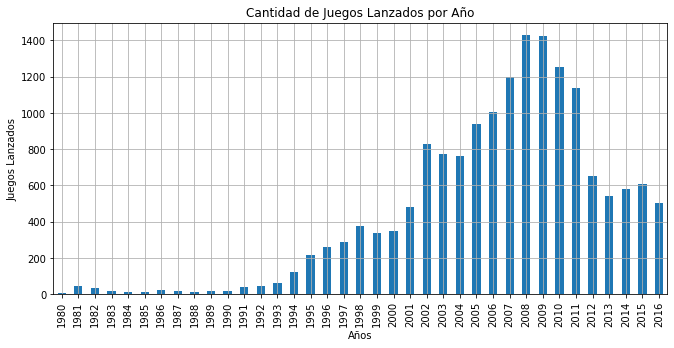

In [ ]:
# Graficamos los datos

plt.figure(figsize = (11,5))
games_per_year.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Juegos Lanzados')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.show()

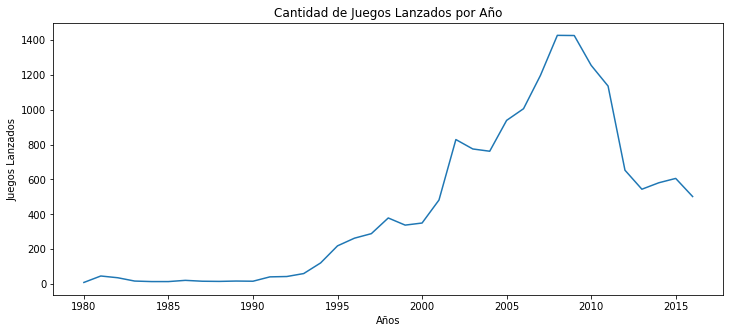

In [ ]:
# Creamos un gráfico alternativo
games_per_year.plot(figsize=(12,5))
plt.xlabel('Años')
plt.ylabel('Juegos Lanzados')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.show()

Como vemos en el gráfico, en los años de la década de los 80 la cantidad de juegos lanzados al mercado no superaba los 100 títulos. A partir de los años de la década de los 90 el mercado de los juegos comienza a crecer. En los años 2008 y 2009 es donde más se lanzan juegos, superando los 1.400 títulos por año. Luego los lanzamientos descienden abruptamente en el año 2012, y siguen descendiendo gradualmente hasta el año 2016.


### Observamos cómo varían las ventas entre las plataformas

A continuación observaremos  cómo varían las ventas de una plataforma a otra. Elegiremos las plataformas con las mayores ventas totales y construiremos una distribución basada en los datos de cada año. Buscaremos las plataformas que solían ser populares pero que ahora no tienen ventas. Y veremos cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.

In [ ]:
# Visualizamos las ventas en función a las plataformas
sales_per_plat = ice.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales')
sales_per_plat

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


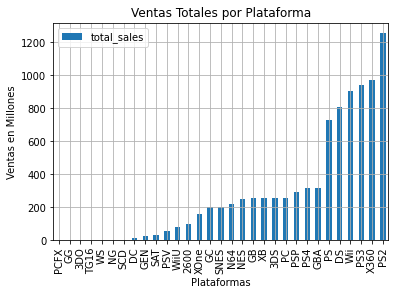

In [ ]:
# Graficamos los datos
sales_per_plat.plot(kind='bar', grid=True)

plt.xlabel('Plataformas')
plt.ylabel('Ventas en Millones')
plt.title('Ventas Totales por Plataforma')
plt.show()

Como se puede ver, la PS2 es la consola que ha generado mayores ganancias, seguida de la X360 y la PS3. Mientras que las ganancias de las consolas más antiguas son mucho menores

Ahora elegiremos las plataformas con las mayores ventas totales y construiremos una distribución basada en los datos de cada año. Para esto crearemos una tabla filtrada por las plataformas: **PS2**, **X360**, **PS3**, **Wii**, **DS** y **PS**.

In [ ]:
# Creamos nuestra tablas con las plataformas con más ventas
most_sales_plats = ice[ice['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]

In [ ]:
# Revisamos la distribución de ventas por año
sales_per_year = most_sales_plats.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()
sales_per_year

,total_sales
year_of_release,
1985,0.02
1994,6.03
1995,35.96
1996,94.70
1997,136.17
1998,169.49
1999,144.53
2000,135.54
2001,202.02


Aquí curiosamente podemos ver que hay un juego en 1985 para consolas más modernas. Antes de graficar, investigaremos este caso.

In [ ]:
# Revisamos el juego de 1985
most_sales_plats[most_sales_plats['year_of_release']==1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,T,0.02


Podemos ver que se trata de un juego de DS. El año es incorrecto ya que la plataforma DS salío muchos años después. De este modo, podemos concluir que se trata de una fecha erróne. Para que no interfiera con nuestra investigación quitaremos esta fila de la tabla.

In [ ]:
# Quitamos la fila
most_sales_plats = most_sales_plats.drop([15957])

In [ ]:
# Actualizamos la agrupación
sales_per_year = most_sales_plats.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()

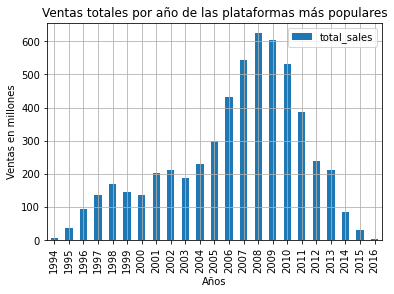

In [ ]:
# Graficamos los datos

sales_per_year.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Ventas en millones')
plt.title('Ventas totales por año de las plataformas más populares')
plt.show()

En este gráfico podemos ver las ventas totales en función a las 5 plataformas con mayores ventas.

 - En el gráfico podemos observar un aumento significativo de las ventas desde los años 90 hasta los años 2008 y 2009. Despues de este punto, las ventas comienzan a descender.


 - Esto puede deberse a que a medida que avanzan los años, la tecnología también, y la complejidad de desarrollar juegos es mayor. En resumidas cuentas, se lanzan menos juegos por año y la tecnología es más cara.

#### Ahora veremos las ganancias totales por consolas por separado.

Comenzaremos con la **PS2**

In [ ]:
# Calculamos las ventas totales de la pataforma en función a los años
ice_ps2 = ice[ice['platform']=='PS2']
ice_ps2_sales = ice_ps2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()

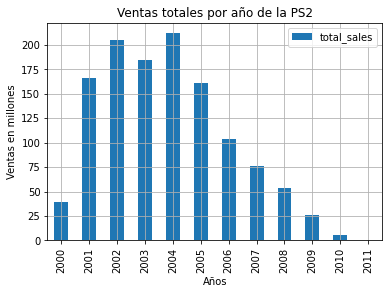

In [ ]:
# Graficamos los datos

ice_ps2_sales.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Ventas en millones')
plt.title('Ventas totales por año de la PS2')
plt.show()

Seguimos con **X360**

In [ ]:
# Calculamos las ventas totales de la pataforma en función a los años
ice_x360 = ice[ice['platform']=='X360']
ice_x360_sales = ice_x360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()

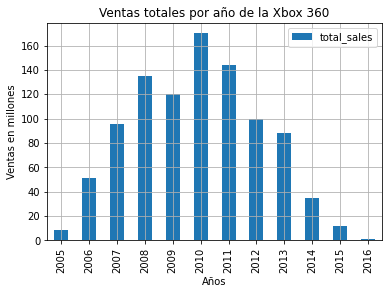

In [ ]:
# Graficamos los datos

ice_x360_sales.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Ventas en millones')
plt.title('Ventas totales por año de la Xbox 360')
plt.show()

Seguimos con la **PS3**

In [ ]:
# Calculamos las ventas totales de la pataforma en función a los años
ice_ps3 = ice[ice['platform']=='PS3']
ice_ps3_sales = ice_ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()

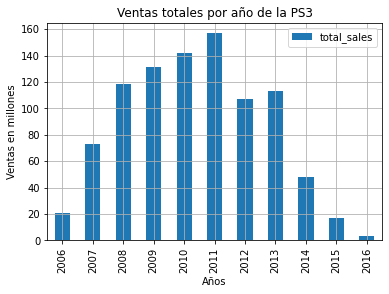

In [ ]:
# Graficamos los datos

ice_ps3_sales.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Ventas en millones')
plt.title('Ventas totales por año de la PS3')
plt.show()

Continuamos con la consola **Wii**

In [ ]:
# Calculamos las ventas totales de la pataforma en función a los años
ice_wii = ice[ice['platform']=='Wii']
ice_wii_sales = ice_wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()

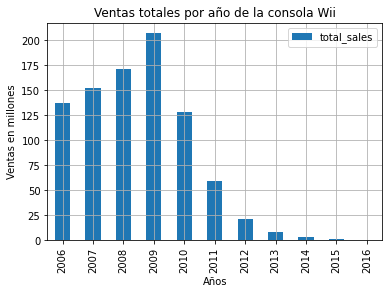

In [ ]:
# Graficamos los datos

ice_wii_sales.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Ventas en millones')
plt.title('Ventas totales por año de la consola Wii')
plt.show()

Revisamos la consola **DS**

In [ ]:
# Calculamos las ventas totales de la pataforma en función a los años
ice_ds = ice[ice['platform']=='DS']
ice_ds_sales = ice_ds.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()

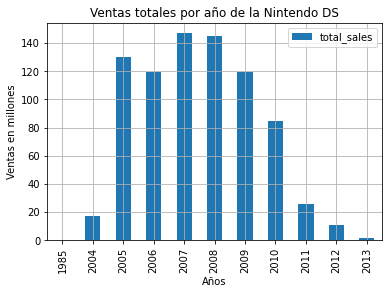

In [ ]:
# Graficamos los datos

ice_ds_sales.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Ventas en millones')
plt.title('Ventas totales por año de la Nintendo DS')
plt.show()

Por último revisamos la **PS**

In [ ]:
# Calculamos las ventas totales de la pataforma en función a los años
ice_ps = ice[ice['platform']=='PS']
ice_ps_sales = ice_ps.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_index()

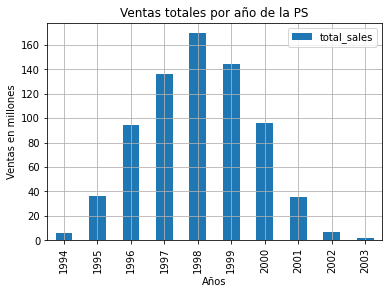

In [ ]:
# Graficamos los datos

ice_ps_sales.plot(kind='bar', grid=True)

plt.xlabel('Años')
plt.ylabel('Ventas en millones')
plt.title('Ventas totales por año de la PS')
plt.show()

 - La **PS2** alcanzó sus mayores ventas entre los años 2001 y 2005, en algunos años superando los 200 millones.


 - Las consolas **X360** y **PS3** presentan comportamientos bastante similares. Esto puede deberse a que eran consolas que salieron en años muy cercanos y generaron bastante competencia entre ellas. Ambas alcanzaron sus ventas totales en los años 2010 y 2011.


 - La consola **Wii** se lanzó en la misma era que la X360 y PS3. Fue una consola bastante popular, y en el año 2009 llegó a superar los 200 millones. Como se puede ver en el gráfico, generó más ingresos totales en sus primeros años en comparación a la X360 y PS3.

 - La Nintendp **DS** es una consola que se lanzó el año 2004 y que generó su mayor cantidad de ingresos entre los años 2005 y 2010, superando en algunos años los 140 millones.


 - La **PS** se anzó en 1994 y alcanzó su mayor popularidad en el año 1998, alcanzando casi los 175 millones aquel año.

Ahora buscaremos las plataformas que solían ser populares pero que ahora no tienen ventas. Y veremos cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.

In [ ]:
# Calculamos las ventas totales por año y por plataforma
plat_sales2 = most_sales_plats.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

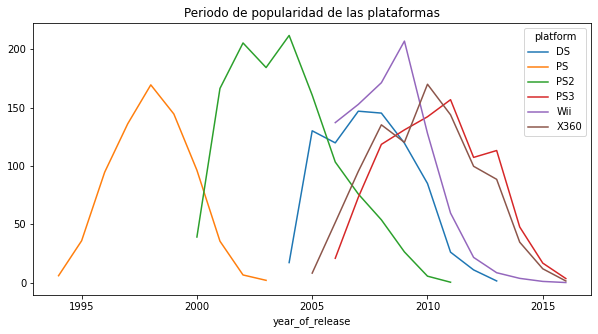

In [ ]:
# Graficamos los datos
plat_sales2.plot(figsize=(10,5))
plt.title("Periodo de popularidad de las plataformas")
plt.show()

Por medio de este gráfico podemos ver cómo cada consola alcanza su punto máximo de ventas y comienza a decaer a medida que avanzan los años y salen al mercado nuevas consolas.

 - Como se puede ver en los gráficos, las consolas tardan alrededor de 10 años en desaparecer.


 - Además, las consolas no se lanzan una después de otra, es decir, para el momento que una desaparece ya hay otra ganando popularidad. Por ejemplo, cuando las ventas de la PS estaban bajando, la popularidad de la PS2 subía. Esto se debe a que hay varias empresas desarrollando consolas.

### Ahora determinaremos para qué periodo tomaremos datos

Esto nos permitirtá construir un modelo para 2017. Para esto visualizaremos la cantidad de juegos lanzados por año.

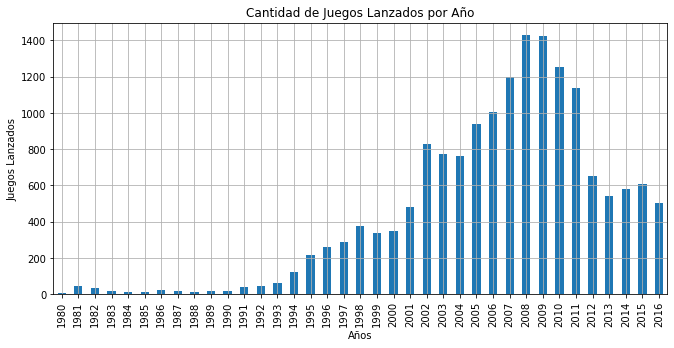

In [ ]:
# Visualizamos los datos

plt.figure(figsize = (11,5))
games_per_year.plot(kind='bar', grid=True)
plt.xlabel('Años')
plt.ylabel('Juegos Lanzados')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.show()

Como podemos ver, los valores comienzan a ser más relevantes a partir del año **1995**, pero el objetivo con los datos es crear un modelo para el 2017, de este modo filtraremos la tabla desde el año 2012 en adelante.

### Filtramos la tabla a partir del año seleccionado

Aquí crearemos una tabla filtrada llamada **new_ice** con los datos a partir de 2012 en adelante.

In [ ]:
# Filtramos el DataFrame
new_ice = ice[ice['year_of_release'] > 2011]

In [ ]:
# Revisamos el DataFrame
new_ice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### ¿Qué plataformas son líderes en ventas?

Aquí veremos ¿qué plataformas son líderes en ventas?, ¿cuáles crecen y cuáles se reducen? Además, elegiremos varias plataformas potencialmente rentables. Para responder a estas preguntas graficaremos las ventas totales por año y por plataforma.

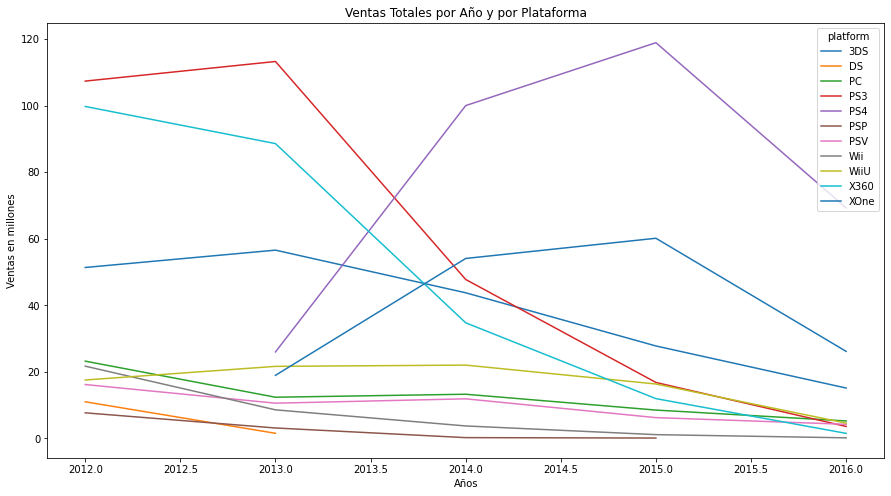

In [ ]:
# Graficamos las ventas totales por año y por plataforma
plat_sales3 = new_ice.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plat_sales3.plot(figsize=(15,8))
plt.xlabel("Años")
plt.ylabel("Ventas en millones")
plt.title("Ventas Totales por Año y por Plataforma")
plt.show()

In [ ]:
# Revisamos las ventas totales por plataforma
print()
print("1. Las plataformas líderes en ventas son las siguientes:")
new_ice.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)


1. Las plataformas líderes en ventas son las siguientes:


,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32


2. A través del tiempo la mayoría delas plataformas tienen un perioro de popularidad y luego se reducen, debido a que van saliendo nuevas consolas y nuevos juegos.

3. Pensamos que las plataformas potencialmente rentables son las de nintendo, con consolas como WiiU y 3DS, las consolas de la línea Play Station, tales como PS3, PS4, PS5, etc, y la línea Xbox, como XOne y X360, ya que son consolas que se van actualizando con los años y son líderes en ventas.

### Creamos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

Aquí responderemos a las siguientes inógnitas: ¿Son significativas las diferencias en las ventas?, ¿qué sucede con las ventas promedio en varias plataformas?

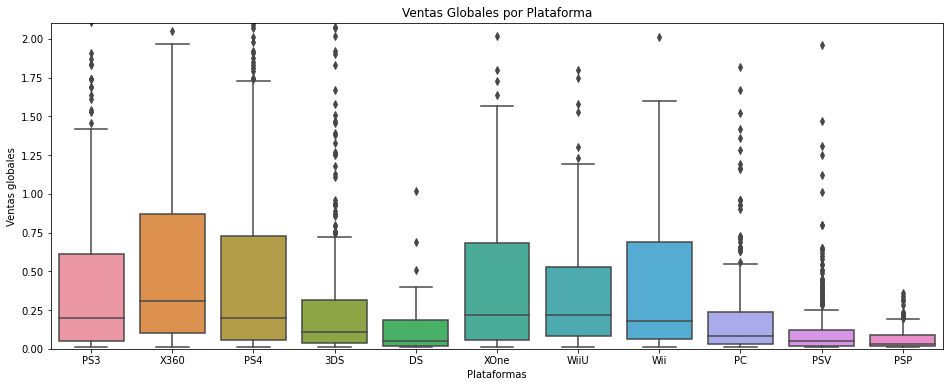

In [ ]:
# graficamos el diagrama de caja de las ventas globales por plataforma
plt.figure(figsize=(16, 6))
sns.boxplot(data=new_ice, x='platform', y='total_sales')
plt.xlabel('Plataformas')
plt.ylabel('Ventas globales')
plt.title('Ventas Globales por Plataforma')
# con plt.ylim vemos las cajas más de cerca
plt.ylim(bottom=0, top=new_ice['total_sales'].max() * 0.10)
plt.show()

 - 1. En el gráfico podemos ver una clara diferencia entre las ventas de las plataformas líderes y otras consolas.

In [ ]:
# Mostramos las ventas promedio por plataforma
new_ice.pivot_table(index='platform', values='total_sales').sort_values('total_sales', ascending=False)

,total_sales
platform,
X360,0.810068
PS4,0.801378
Wii,0.655000
XOne,0.645020
PS3,0.585781
WiiU,0.559116
3DS,0.491439
DS,0.404839
PC,0.250600


 - 2. En este caso las plataformas líderes mencionadas anteriormente tienen los promedios de ventas más altos.

### Ahora veremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular

Para esto utilizaremos la plataforma PS4. Crearemos un gráfico de dispersión y calcularemos la correlación entre las reseñas y las ventas, y sacaremos conclusiones a partir de esto.

In [ ]:
# Filtramos nuestra tabla por la consola PS3
new_ice_ps4 = new_ice[new_ice['platform']=='PS4']

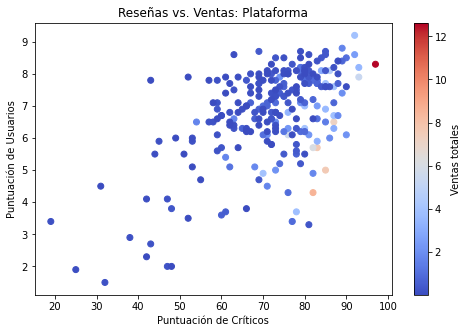

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(new_ice_ps4['critic_score'], new_ice_ps4['user_score'], c=new_ice_ps4['total_sales'], cmap='coolwarm')

plt.xlabel('Puntuación de Críticos')
plt.ylabel('Puntuación de Usuarios')
plt.title('Reseñas vs. Ventas: Plataforma')
plt.colorbar(label='Ventas totales')

plt.show()

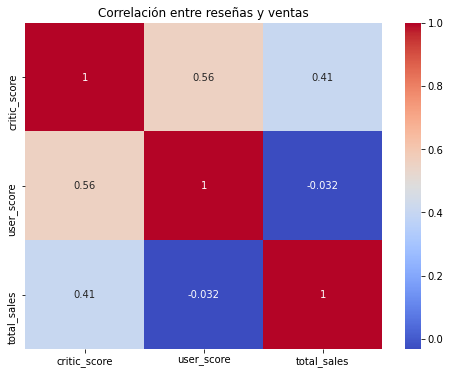

In [ ]:
# Graficamos las correlaciones entre las reseñas y las ventas
corr = new_ice_ps4[['critic_score', 'user_score', 'total_sales']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap= "coolwarm")
plt.title('Correlación entre reseñas y ventas')
plt.show()

 Al observar el gráfico de dispersión podemos ver que, tanto para **'critic_score'** y **'user_score'**, mientras más alta es la reseña, mayores son las ventas.

Por otro lado, el gráfico de correlación nos indica lo siguiente:

 - 1. La correlación entre **critic_score** y **total_sales** es de 0.41, esto es una correlación positiva moderada. Esto sugiere que a medida que la puntuación de los criticos aumenta, las ventas de los juegos de PS2 también aumenta.
 - 2. La correlación entre **user_score** y **total_sales** es de -0.032. Esto nos indica una correlación bastante débil. En otras palabras, **user_score** no parece tener un impacto sustancial en las ventas totales de los juegos.
Con esto podemos concluir que, para la plataforma PS4, las puntuaciones de los críticos tienen una mayor importancia para los consumidores al momento de adquirir juegos.

###  Comparamos las ventas de los mismos juegos en otras plataformas.

Para esto seleccionaremos 3 juegos que se hayan vendido en 3 plataformas y compararemos sus ventas.

Seleccionamos las plataformas:
 - 1.X360
 - 2.PC
 - 3.PS3

Seleccionaremos los juegos:
 - 1. Grand Theft Auto V
 - 2. Borderlands 2
 - 3. Call of Duty: Black Ops II

In [ ]:
# Filtramos por plataformas seleccionadas
name_plat_new_ice = new_ice[(new_ice['platform'].isin(['X360', 'PC', 'PS3']))
& (new_ice['name'].isin(['Call of Duty: Black Ops II', 'Borderlands 2', 'Grand Theft Auto V']))]

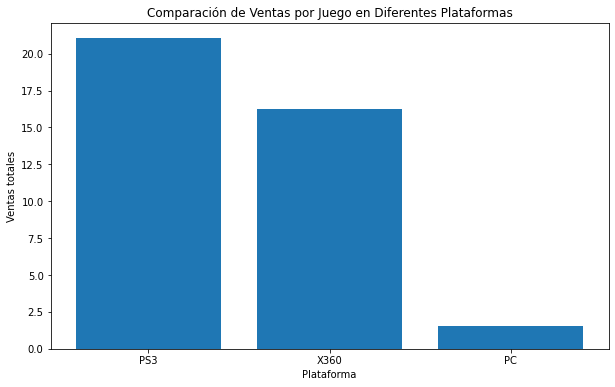

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(name_plat_new_ice['platform'], name_plat_new_ice['total_sales'])

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Comparación de Ventas por Juego en Diferentes Plataformas')

plt.show()

Aquí podemos ver las ventas de las plataformas para 3 juegos, y se puede ver que para estos 3 casos PS3 vendió más que la X360. Los juegos de PC fueron los menos vendidos.

Además sería interesante ver esta comparación por juego de manera individual.

1. Vemos las ventas por plataforma para **'Grand Theft Auto V'**.

In [ ]:
# Filtramos por plataformas y el juego 'Dead_Space'
name_plat_ds = new_ice[(new_ice['platform'].isin(['X360', 'PC', 'PS3']))
& (new_ice['name']=='Grand Theft Auto V')]

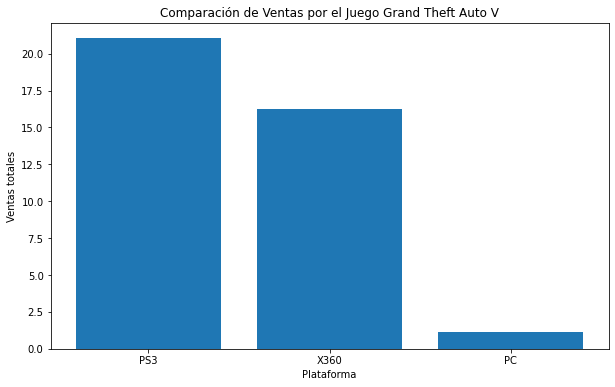

In [ ]:
# Graficamos
plt.figure(figsize=(10, 6))
plt.bar(name_plat_ds['platform'], name_plat_ds['total_sales'])

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Comparación de Ventas por el Juego Grand Theft Auto V')

plt.show()

2. Ahora veremos las ventas por plataforma para **'Call of Duty: Black Ops II'**.

In [ ]:
# Filtramos por plataformas y el juego 'Call of Duty: Black Ops II'
name_plat_me = new_ice[(new_ice['platform'].isin(['X360', 'PC', 'PS3']))
& (new_ice['name']=='Call of Duty: Black Ops II')]

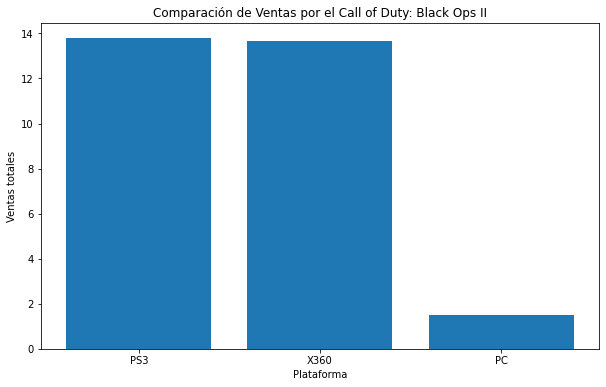

In [ ]:
# Graficamos
plt.figure(figsize=(10, 6))
plt.bar(name_plat_me['platform'], name_plat_me['total_sales'])

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Comparación de Ventas por el Call of Duty: Black Ops II')

plt.show()

3. Continuamos con el juego **'Borderlands 2'**.

In [ ]:
# Filtramos por plataformas y el juego 'Borderlands 2'
name_plat_bl2 = new_ice[(new_ice['platform'].isin(['X360', 'PC', 'PS3']))
& (new_ice['name']=='Borderlands 2')]

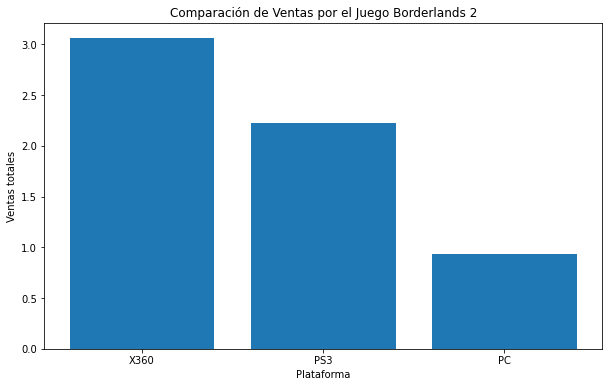

In [ ]:
# Graficamos
plt.figure(figsize=(10, 6))
plt.bar(name_plat_bl2['platform'], name_plat_bl2['total_sales'])

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Comparación de Ventas por el Juego Borderlands 2')

plt.show()

Como podemos ver por medio de los gráficos, para estos casos, la plataforma **PC** es la que menos juegos vende. En el caso de **PS3** y **X360** pudimos notar que algunos juegos se venden más en PS3 que en X360, y viceversa. Esto está muy sujeto a los gustos de los consumidores por las plataforma, entre otros factores.

#### Por último sería interesante ver las ventas totales de estas 3 plataformas.

In [ ]:
# Filtramos por las 3 plataformas
total_plat_new_ice = new_ice[new_ice['platform'].isin(['X360', 'PC', 'PS3'])]

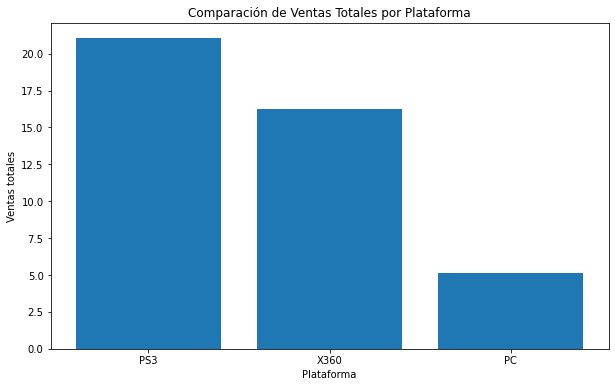

In [ ]:
# Graficamos
plt.figure(figsize=(10, 6))
plt.bar(total_plat_new_ice['platform'], total_plat_new_ice['total_sales'])

plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.title('Comparación de Ventas Totales por Plataforma')

plt.show()

para estos casos **las ventas totales de X360 son menores a las de PS3**. Mientras que **las ventas para los juegos de pc no superaron los 10 millones**. Cabe resaltar que tanto la X360 y la PS3 tienen en gran medida los mismos títulos. De este modo, esta tabla sería más realista comparando las ventas por todos los títulos posibles.

### Estudia la distribución general de los juegos por género

Ahora responderemos a las siguientes incógnitas: ¿Qué se puede decir de los géneros más rentables? ¿Se puede generalizar acerca de los géneros con ventas altas y bajas?

In [ ]:
# Mostramos las ventas totales por género
new_ice_gen = new_ice.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales')
new_ice_gen

,total_sales
genre,
Puzzle,4.89
Strategy,13.34
Adventure,29.43
Simulation,35.12
Fighting,44.49
Racing,53.50
Platform,61.00
Misc,85.04
Sports,181.07


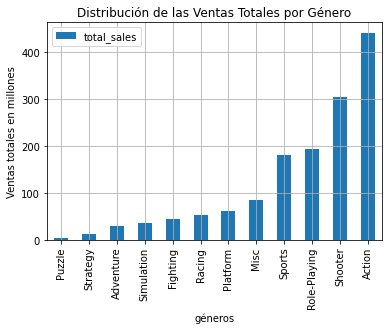

In [ ]:
# Visualizamos la distribución de las ventas totales por género
new_ice_gen.plot(kind='bar', grid=True)
plt.xlabel('géneros')
plt.ylabel('Ventas totales en millones')
plt.title('Distribución de las Ventas Totales por Género')
plt.show()

Al observar el gráfico podemos ver que:
 - Los géneros más rentables son 'Sooter' y 'Action', superando los 300 millones, y en el caso de 'Action' superando los 400 millones, es decir, son los géneros más rentables.
 - Y 'Puzzle', 'Strategy' y 'Adventure' son los menos rentables.

In [ ]:
# Distribución por número de juegos en función a los géneros
games_genre_dist =  new_ice.pivot_table(index='genre', values='total_sales', aggfunc='count').sort_values(by='total_sales')
games_genre_dist

,total_sales
genre,
Puzzle,28
Strategy,71
Simulation,80
Platform,85
Fighting,109
Racing,115
Misc,192
Shooter,235
Sports,268


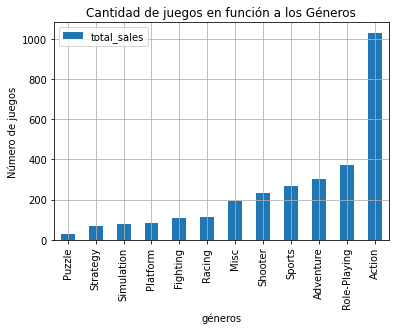

In [ ]:
# Visualizamos los datos
games_genre_dist.plot(kind='bar', grid=True)
plt.xlabel('géneros')
plt.ylabel('Número de juegos')
plt.title('Cantidad de juegos en función a los Géneros')
plt.show()

 - Al observar ambos gráficos, podemos ver que la cantidad de juegos lanzados está en gran medida relacionada con las ventas totales. Es decir, mientras más juegos por plataforma, mayores son las ventas. Esto es evidente para 'Action'.

 - Por otro lado tenemos casos como el de 'Role-Playing' y 'Shooter'. Aunque existen más juegos del género 'Role-Playing', el género 'shooter' ha logrado generar al rededor de 100 millones más, debido a que posiblemente los juegos de 'shooter' son más caros.

 En resumen, mientras más juegos haya en una plataforma, más millones genera. Sin embargo, también hay generos con juegos más caros.

# Creamos un perfil de usuario para cada región

Para cada región (NA, EU, JP) determinaremos:
 - Las cinco plataformas principales. Describiremos las variaciones en sus cuotas de mercado de una región a otra.
 - Los cinco géneros principales. Explicaremos la diferencia.
 - Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Comenzaremos determinando las cinco plataformas principales para cada región y describiremos las variaciones en sus cuotas de mercado de una región a otra.


In [ ]:
# Determinamos las cinco plataformas principales de JP
new_ice_jp = new_ice.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
print(f"Las cinco principales plataformas de JP son: {new_ice_jp}")


Las cinco principales plataformas de JP son:           jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01


In [ ]:
# Determinamos las cinco plataformas principales de EU
new_ice_eu = new_ice.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
print(f"Las cinco principales plataformas de EU son: {new_ice_eu}")


Las cinco principales plataformas de EU son:           eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64


In [ ]:
# Determinamos las cinco plataformas principales de NA
new_ice_na = new_ice.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
print(f"Las cinco principales plataformas de NA son: {new_ice_na}")


Las cinco principales plataformas de NA son:           na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31


A continuación visualizaremos un gráfico de barras para ver las diferencias de ventas de las 5 plataformas principales para cada región.

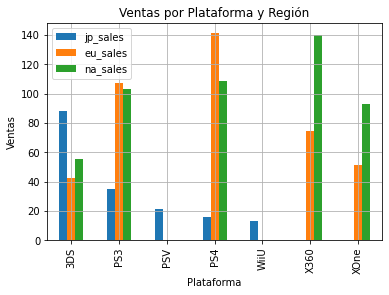

In [ ]:
#Combinamos las tablas de las 3 regiones para graficar los datos por región de forma simultánea
combined_data = pd.concat([new_ice_jp, new_ice_eu, new_ice_na], axis=1)

# Graficamos
combined_data.plot(kind='bar', grid=True)
plt.title('Ventas por Plataforma y Región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.show()


Lo primero que pudimos observar aquí al graficar las ventas por plataformas y región, es que algunas consolas varían entre regiones. Además podemos ver una clara diferencia de ventas entre las regiones:

 - 1. **JP**: las cinco plataformas más populares en japón son: **PSV, PS3, WiiU, 3DS y PS4**. Por otra parte sus ventas son mucho menores que en las otras dos regiones. En japón la plataforma 3DS es la que más vende.
 - 2. **EU**:  las cinco plataformas más populares en Unión Europea son: **3DS, X360, PS3, PS4 y XOne**. Sus ventas por plataformas son bastante más superiores a las de JP y algunas logran superar los 300 millones.
 - 3. **NA**: las cinco plataformas más populares en Norteamérica son: **3DS, PS4, PS3, X360 y XOne**.

Es probable que las diferencias de ventas por región se deban a su número de población, factores económicos y sociales.

### Ahora veremos los cinco géneros principales por región.

In [ ]:
# Determinamos los cinco géneros principales de JP
new_ice_jp_gen = new_ice.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
print(f"Los cinco géneros principales de JP son: {new_ice_jp_gen}")


Los cinco géneros principales de JP son:               jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44


In [ ]:
# Determinamos los cinco géneros principales de EU
new_ice_eu_gen = new_ice.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
print(f"Los cinco géneros principales de EU son: {new_ice_eu_gen}")


Los cinco géneros principales de EU son:               eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29


In [ ]:
# Determinamos los cinco géneros principales de NA
new_ice_na_gen = new_ice.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
print(f"Los cinco géneros principales de NA son: {new_ice_na_gen}")

Los cinco géneros principales de NA son:               na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19


A continuación visualizaremos un gráfico de barras para ver las diferencias de ventas de los 5 géneros principales para cada región.

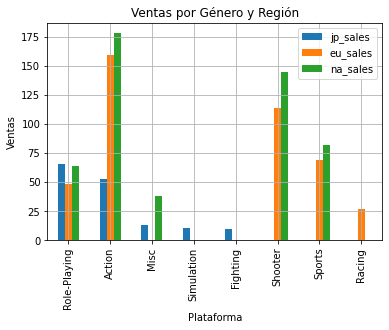

In [ ]:
#Combinamos las tablas de las 3 regiones para graficar los datos por región de forma simultánea
combined_data2 = pd.concat([new_ice_jp_gen, new_ice_eu_gen, new_ice_na_gen], axis=1)

# Graficamos
combined_data2.plot(kind='bar', grid=True)
plt.title('Ventas por Género y Región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.show()

En este caso las plataformas también varían entre las regiones. Por otro lado, las 3 regiones comparten las plataformas: 'Action', 'Sports' y 'Misc'.

 - 1. **JP**: los cinco géneros más populares en japón son: **Role_playing, Action, Simulation, Misc y Fighting**. Por otra parte el género más popular es Japón es **Role_Playin**.
 - 2. **EU**:  los cinco géneros más populares en Unión Europea son: **Action, Sports, Role_Playing, Shooter y Racing**. Su género preferido es **Action**.
 - 3. **NA**: los cinco géneros más populares en Norteamérica son: **Action, Sports, Misc, Shooter y Role-Playing**. El gnénero más popular en esta región es **Action**.

En este caso en todas las regiones se comparten los géneros populares **Action, Role-Playimng**, los demás tienden a variar.

### Ahora veremos si las clasificaciones de ESRB afectan a las ventas

In [ ]:
# Total de ventas en función al rating
new_ice_jp_rating = new_ice.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
print(f"Ventas en función a rating en JP: {new_ice_jp_rating}")

Ventas en función a rating en JP:         jp_sales
rating          
T         108.70
E          53.40
M          22.29
E10+        8.19


In [ ]:
# Total de ventas en función al rating
new_ice_eu_rating = new_ice.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
print(f"Ventas en función a rating en EU: {new_ice_eu_rating}")

Ventas en función a rating en EU:         eu_sales
rating          
M         211.19
E         144.98
T          95.28
E10+       55.37


In [ ]:
# Total de ventas en función al rating
new_ice_na_rating = new_ice.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
print(f"Ventas en función a rating en NA: {new_ice_na_rating}")

Ventas en función a rating en NA:         na_sales
rating          
M         251.43
E         141.52
T         122.32
E10+       75.70


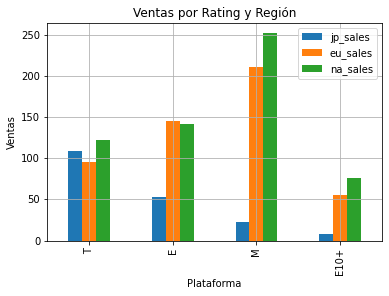

In [ ]:
#Combinamos las tablas de las 3 regiones para graficar los datos por región de forma simultánea
combined_data3 = pd.concat([new_ice_jp_rating, new_ice_eu_rating, new_ice_na_rating], axis=1)

# Graficamos
combined_data3.plot(kind='bar', grid=True)
plt.title('Ventas por Rating y Región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.show()

Al observar el gráfico, el comportamiento de rating para NA y EU es bastante similar. En JP predominan juegos con el rating T. Por otra parte, en las tres regiones los juegos con los ratings más populares son **T, E y M**. De este modo podemos ver que la clasificación incide en la venta de los juegos, entre otros factores.

In [ ]:
new_ice.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

# Probamos las siguientes hipótesis:
 -  1.Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 -  2.Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Primero que nada, quitaremos los 'nan' de la columna **user_score** para no tener problemas al correr los T-Test.

In [ ]:
# Quitamos los valores nulos de 'user_score'
ice = ice.dropna()

In [ ]:
# Filtramos la tabla por los años seleccionados
test_ice = ice[ice['year_of_release'] > 2011]

## Prueba 1

Comenzaremos probando la siguiente hipotesis : **"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas"**. Para esto utilizaremos una prueba de hipótesis de dos poblaciones y de dos colas, ya que buscaremos diferencias; estableciendo la hipotesis nula y alternativa como:

 - H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
 - H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [ ]:
# Primero crearemos dos tablas alternativas con las plataformas mencionadas
platform_pc = test_ice[test_ice['platform']=='PC']
platform_xone = test_ice[test_ice['platform']=='XOne']

In [ ]:
# Revisamos las varianzas de ambas tablas
print(f"La varianza de 'platform_pc' es: {np.var(platform_pc['user_score'])}")
print(f"La varianza de 'platform_xone' es: {np.var(platform_xone['user_score'])}")

La varianza de 'platform_pc' es: 2.6741565100878666
La varianza de 'platform_xone' es: 1.7855118457300279


In [ ]:
# Probamos las hipótesis

# Dejamos el parámetro 'equal_var' en 'False' debido a la variabilidad de las varianzas
results_1 = ttest_ind(
    platform_pc['user_score'],
    platform_xone['user_score'],
    equal_var = False
)
# Establecemos el valor alfa
alpha = 0.05

print('p-value:', results_1.pvalue)

if results_1.pvalue < alpha:
     print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.5926561176517491
No rechazamos la hipótesis nula


En este caso el P-value es bastante mayor a Alpha. De este modo **tenemos la suficiente evidencia para no rechazar la hipotesis nula**.


## Prueba 2

Continuamos con la segunda prueba, donde intentaremos probar la siguiente hipotesis: **"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes"**. Para esto, nuevamente,  utilizaremos una prueba de hipótesis de dos poblaciones y de dos colas, ya que buscaremos diferencias; estableciendo la hipotesis nula y alternativa como:

 - H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.
 - H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [ ]:
# Creamos dos tablas alternativas con los valores de ambas consolas
genre_action = test_ice[test_ice['genre']=='Action']
genre_sports = test_ice[test_ice['genre']=='Sports']

In [ ]:
# Revisamos las varianzas de ambas tablas
print(f"La varianza de 'genre_action' es: {np.var(genre_action['user_score'])}")
print(f"La varianza de 'genre_sports' es: {np.var(genre_sports['user_score'])}")

La varianza de 'genre_action' es: 1.7476152584876543
La varianza de 'genre_sports' es: 1.9718042351994367


In [ ]:
# Probamos las hipótesis

# Dejamos el parámetro 'equal_var' en 'False' debido a la variabilidad de las varianzas
results_1 = ttest_ind(
    genre_action['user_score'],
    genre_sports['user_score'],
    equal_var = False
)
# Establecemos el valor alfa
alpha = 0.05

print('p-value:', results_1.pvalue)

if results_1.pvalue < alpha:
     print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 5.858072645452818e-14
Rechazamos la hipótesis nula


En este caso el P-value es bastante menor al valor Alpha, de este modo **tenemos evidencia suficiente para rechazar la hipotesis nula**.

# Conclusión general

A modo más general, pudimos ver que hay parámetros que afectan en las ventas de los juegos, tales como la clasificación, el género y la plataforma. En este caso, pudimos ver que los juegos con los géneros más vendidos son 'Shooter' y 'Action'. Por otra parte las plataformas que venden más juegos a partir del 2012 son: PS4, PS3, X360, 3DS y XOne. Y que los juegos con los ratings más populares son T, E y M. Es decir, estos son los parámetros que tienen los juegos con mayores ventas.

**Esta información es de suma importancia ya que nos permitirá invertir o realizar una asesoría de inversión para el año 2017**.

De forma más detallada, al realizar el estudio pudimos concluir que:
 - 1. En los años de la década de los 80 la cantidad de juegos lanzados al mercado no superaba los 100 títulos. A partir de los años de la década de los 90 el mercado de los juegos comienza a crecer. En los años 2008 y 2009 es donde más se lanzan juegos, superando los 1.400 títulos por año. Luego los lanzamientos descienden abruptamente en el año 2012, y siguen descendiendo gradualmente hasta el año 2016.
 - 2. La PS2 es la consola que ha generado mayores ganancias, seguida de la X360 y la PS3. Mientras que las ganancias de las consolas más antiguas son mucho menores.
 - 3. Las consolas tardan alrededor de 10 años en desaparecer. Además, las consolas no se lanzan una después de otra, es decir, para el momento que una desaparece ya hay otra ganando popularidad. Por ejemplo, cuando las ventas de la PS estaban bajando, la popularidad de la PS2 subía. Esto se debe a que hay varias empresas desarrollando consolas.
 - 4. Las plataformas potencialmente rentables son las de nintendo, con consolas como WiiU y 3DS, las consolas de la línea Play Station, tales como PS3, PS4, PS5, etc, y la línea Xbox, como XOne y X360, ya que son consolas que se van actualizando con los años y son líderes en ventas.
 - 5. Para la plataforma PS4, las puntuaciones de los críticos tienen una mayor importancia para los consumidores al momento de adquirir juegos.
 - 6. Al observar el comportamiento de venta de los mismos juegos en diferentes consolas, pudimos ver que la plataforma PC es la que menos juegos vende. En el caso de PS3 y X360 pudimos notar que algunos juegos se venden más en PS3 que en X360, y viceversa. Esto está muy sujeto a los gustos de los consumidores por las plataforma, entre otros factores.
 - 7. Los géneros más rentables son 'Shooter' y 'Action', superando los 300 millones en ventas y en el caso de 'Action' superando los 400 millones.
 - 8. Los géneros 'Puzzle', 'Strategy' y 'Adventure' son los menos rentables.

 - 9. Mientras más juegos haya en una plataforma, más millones genera. Sin embargo, también hay generos donde el número de juegos es menor pero estos generan más ingresos al ser más caros.
  
 - 10. Sobre las cinco plataformas más populares por región:

  - 1. **JP**: las cinco plataformas más populares en japón son: **3DS, PS3, P4, WiiU y PSV**. Por otra parte sus ventas son mucho menores que en las otras dos regiones.
  - 2. **EU**:  las cinco plataformas más populares en Unión Europea son: **PS4, PS3, 3DS, XOne y X360**. Sus ventas por plataformas son bastante más superiores a las de JP.
  - 3. **NA**: las cinco plataformas más populares en Norteamérica son: **3DS, PS4, PS3, X360 y XOne.**.

- 11. Los cinco géneros principales por región:
  - 1. JP: los cinco géneros más populares en japón son: Role_playing, Action, Simulation, Misc y Fighting. Por otra parte el género más popular es Japón es Role_Playin.
  - 2. EU: los cinco géneros más populares en Unión Europea son: Action, Sports, Role_Playing, Shooter y Racing. Su género preferido es Action.
  - 3. NA: los cinco géneros más populares en Norteamérica son: Action, Sports, Misc, Shooter y Role-Playing. El gnénero más popular en esta región es Action.
  
  
- 12. El comportamiento de rating para NA y EU es bastante similar, en estos preminan las clasificaciones M y E. En JP predominan juegos con el rating T. Por otra parte, en las tres regiones los juegos con los ratings más populares son T, E y M. De este modo podemos ver que la clasificación incide en la venta de los juegos, entre otros factores.

- 13. Para el caso de las pruebas de hipotesis:
  - 1. Para "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas", el P-value fue bastante mayor a Alpha. De este modo **tuvimos la suficiente evidencia para no rechazar la hipotesis nula**.
  - 2. Para "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes", en este caso el P-value era bastante menor al valor Alpha, de este modo **tuvimos evidencia suficiente para rechazar la hipotesis nula**.

<div class="alert alert-danger">
<h2> Comentarios del revisor </h2>

Muy buen trabajo en general con todo el proyecto, un error importante es validar las fechas que vas a tomar para el análisis ya que no se filtró, recuerda que para hacer un pronóstico del 2017 normalmente debe acotar el análisis y no tomar años tan viejos como 1999, normalmente se toma entre 3 a 5 años para hacer el análisis. Los demás errores son menores y no tendrás problemas con la corrección.
    
Saludos!

</div>

<div class="alert alert-info">
<h2> Comentarios del estudiante</h2>
Tiene bastante sentido. Para hacer el pronóstico del 2017 esta vez filtré la tabla 'new_ice' tomando los años del 2012 en adelante. Y también actualicé la información del proyecto desde esta parte.
Gracias por los comentarios y su revision! :)
</div>

<div class="alert alert-success">
<h2> Comentarios del revisor V2</h2>

Muy buen trabajo Jesus con todo el proyecto y las correcciones, felicitaciones por cubrir todos los puntos del proyecto. Sigue así!

Saludos!
</div>